<a href="https://colab.research.google.com/github/nguyenanhbinh27042002/Artificial-intelligence-AI-/blob/main/Controlling_dynamics_of_a_servomotor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Controlling dynamics of a servomotor 

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=80221bce8a3f031249fae0326b45f7fa34027dde9a8174577eea1982f13029e0
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-28-9a5d5bf3e24a>:62: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='z',offset = 5,cmap='viridis',anlpha = 0.5)
<ipython-input-28-9a5d5bf3e24a>:63: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='y',offset = 10,cmap='viridis',anlpha = 0.5)
<ipython-input-28-9a5d5bf3e24a>:64: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='x',offset = 15,cmap='viridis',anlpha = 0.5)


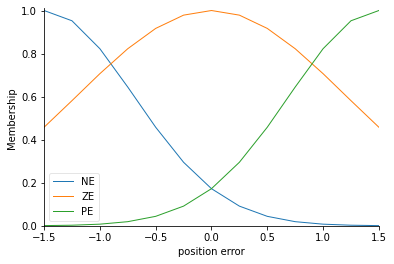

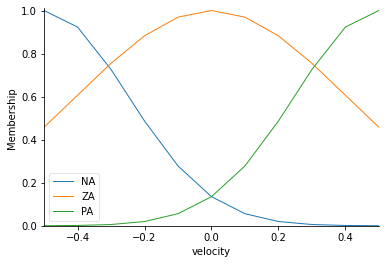

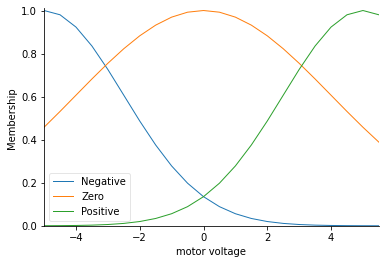

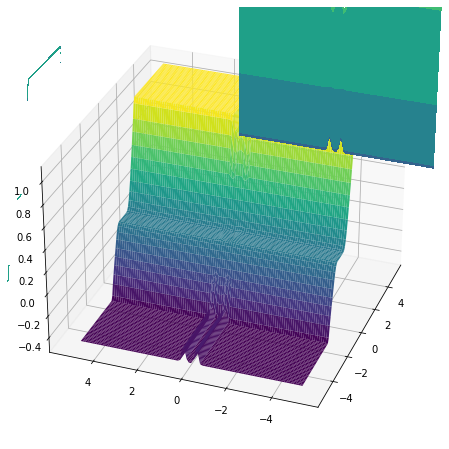

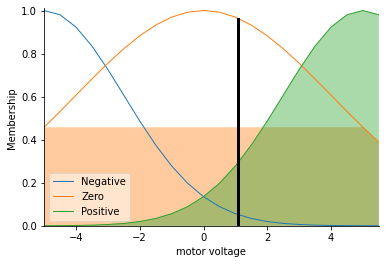

In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from skfuzzy.control.controlsystem import Antecedent
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection


# Define input variables with membership functions
pos_err = ctrl.Antecedent(np.arange(-1.5,1.6,0.25), 'position error')
vel = ctrl.Antecedent(np.arange(-0.5,0.6,0.1), 'velocity')
# Define output variables with membership functions
motor_volt = ctrl.Consequent(np.arange(-5,6,0.5), 'motor voltage')

pos_err['NE'] = fuzz.gaussmf(pos_err.universe,-1.5,0.8)
pos_err['ZE'] = fuzz.gaussmf(pos_err.universe,0,1.2)
pos_err['PE'] = fuzz.gaussmf(pos_err.universe,1.5,0.8)

vel['NA'] = fuzz.gaussmf(vel.universe,-0.5,0.25)
vel['ZA'] = fuzz.gaussmf(vel.universe,0,0.4)
vel['PA'] = fuzz.gaussmf(vel.universe,0.5,0.25)

motor_volt['Negative'] = fuzz.gaussmf(motor_volt.universe,-5,2.5)
motor_volt['Zero'] = fuzz.gaussmf(motor_volt.universe,0,4)
motor_volt['Positive'] = fuzz.gaussmf(motor_volt.universe,5,2.5)


# Define fuzzy logic rules
rule1 = ctrl.Rule(pos_err['NE'] & vel['NA'], motor_volt['Negative'])
rule2 = ctrl.Rule(pos_err['NE'] & vel['ZA'], motor_volt['Negative'])
rule3 = ctrl.Rule(pos_err['NE'] & vel['PA'], motor_volt['Negative'])
rule4 = ctrl.Rule(pos_err['ZE'] & vel['NA'], motor_volt['Zero'])
rule5 = ctrl.Rule(pos_err['ZE'] & vel['ZA'], motor_volt['Zero'])
rule6 = ctrl.Rule(pos_err['ZE'] & vel['PA'], motor_volt['Zero'])
rule7 = ctrl.Rule(pos_err['PE'] & vel['NA'], motor_volt['Positive'])
rule8 = ctrl.Rule(pos_err['PE'] & vel['ZA'], motor_volt['Positive'])
rule9 = ctrl.Rule(pos_err['PE'] & vel['PA'], motor_volt['Positive'])

# Create control system and simulate with input values
motor_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
motor_simulation = ctrl.ControlSystemSimulation(motor_ctrl,flush_after_run=100*100+1)

pos_err.view()
vel.view()
motor_volt.view()

# Compute
upsampled = np.linspace(-5,5,100) 
x,y = np.meshgrid(upsampled,upsampled)
z =np.zeros_like(x)
for i in range(100):
  for j in range(100):
      motor_simulation.input['position error']= x[i,j]
      motor_simulation.input['velocity']= y[i,j]
      motor_simulation.compute()  
      z[i,j]= motor_simulation.output['motor voltage']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1 ,cstride=1 ,cmap='viridis',linewidth=0.4,antialiased =True)
cset = ax.contourf(x,y,z,zdir='z',offset = 5,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='y',offset = 10,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='x',offset = 15,cmap='viridis',anlpha = 0.5)
ax.view_init(30,200)

motor_volt.view(sim =motor_simulation)